# Sod Riemann Problem

Use the Einstein Toolkit to solve the Sod Riemann problem using three
different resolutions. Compare with the exact solution (at least for the restmass density ρ) and discuss your results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir 
from kuibit.grid_data import UniformGrid

## Exact Solution

In [2]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]

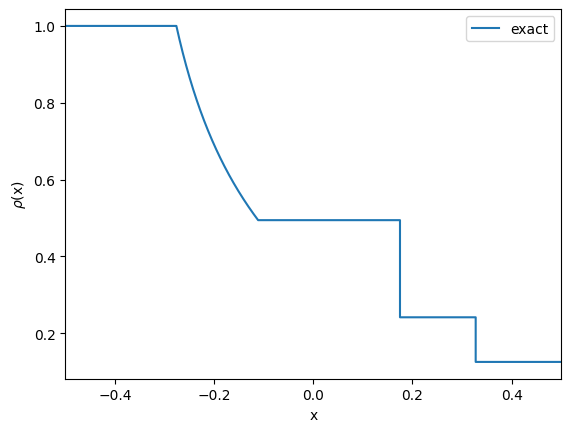

In [4]:
## this is the EXACT SOLUTION TO COMPARE 
plt.plot(x_exact, rho_exact, label="exact") #rho as a function of x
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\rho$(x)")
plt.savefig("/home/jovyan/simulations/exact.png", dpi=200)
plt.show()
# Rarefaction towards the left, then Contact Discontinuity and Shock Wave

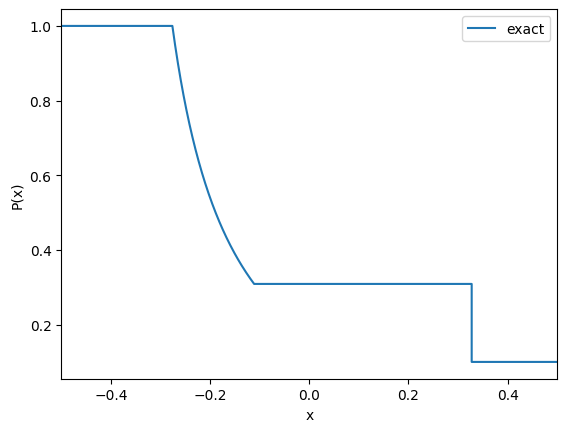

In [5]:
## this is the EXACT SOLUTION TO COMPARE 
plt.plot(x_exact, press_exact, label="exact") #rho as a function of x
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel("x")
plt.ylabel(r"P(x)")
plt.savefig("/home/jovyan/simulations/exactP.png", dpi=200)
plt.show()


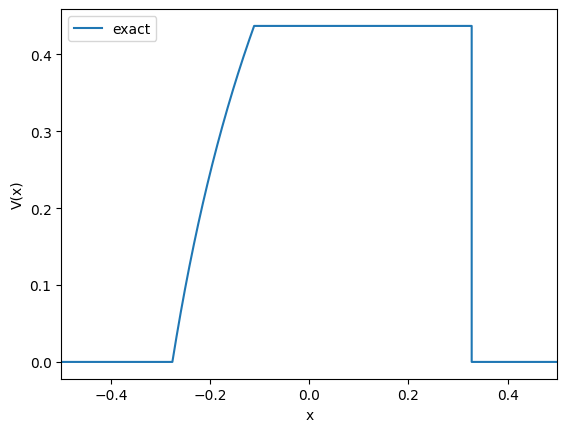

In [6]:
## this is the EXACT SOLUTION TO COMPARE 
plt.plot(x_exact, vx_exact, label="exact") #rho as a function of x
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel("x")
plt.ylabel(r"V(x)")
plt.savefig("/home/jovyan/simulations/exactV.png", dpi=200)
plt.show()

## Read the Numerical Results

In [7]:
#gf is grid function, varibles are saved there  

#400 is the number of points: DX/dx
#DX=1
gf= SimDir("/home/jovyan/simulations/Sod400/").gf #dx=0.0025
print(gf) #let me know which variables are saved 

gf2= SimDir("/home/jovyan/simulations/Sod200/").gf #dx=0.005
gf3= SimDir("/home/jovyan/simulations/Sod2000/").gf #dx=0.0005


Available grid data of dimension 1D (x): 
['press', 'vel[0]', 'eps', 'dens', 'tau', 'scon[1]', 'vel[2]', 'scon[2]', 'scon[0]', 'w_lorentz', 'vel[1]', 'rho']


Available grid data of dimension 1D (y): 
['vel[1]', 'vel[0]', 'vel[2]', 'scon[2]', 'tau', 'eps', 'dens', 'scon[1]', 'scon[0]', 'rho', 'press', 'w_lorentz']


Available grid data of dimension 1D (z): 
['eps', 'scon[1]', 'dens', 'vel[0]', 'vel[2]', 'scon[0]', 'vel[1]', 'rho', 'press', 'w_lorentz', 'scon[2]', 'tau']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [8]:
vars1d=gf.x #only data along x 
print(vars1d)


Available grid data of dimension 1D (x): 
['press', 'vel[0]', 'eps', 'dens', 'tau', 'scon[1]', 'vel[2]', 'scon[2]', 'scon[0]', 'w_lorentz', 'vel[1]', 'rho']



In [9]:
rho=vars1d.fields.rho # I take in particolar rho along x for the three resolutions 
rho2=gf2.x.fields.rho
rho3=gf3.x.fields.rho

#then the pressure 
press=gf.x.fields.press
press2=gf2.x.fields.press
press3=gf3.x.fields.press

#and the velocity along x 
vx=gf.x.fields.vel[0]
vx2=gf2.x.fields.vel[0]
vx3=gf3.x.fields.vel[0]

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

Uniform grid generation and then plot data on the grid. Iterpolate data in uniform grid. 
Grafical rapresentation of data, they are not the row data. Useful for 2D visualizations.

VISIT allows to visualize data 


In [10]:
# It is an interpolation 
# Useful for 2d images, in order to deal with NON CONST MESHES 
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45]) 

In [11]:
#print the result every 10 iteractions-- the max is the total numbers of iteraction 
print(rho.iterations) #final result

print(max(rho2.iterations))
print(max(rho3.iterations))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
100
1000


In [12]:
# I want the last iteraction 

rho_final = rho.read_on_grid(200, small_grid) #interpolate rho over a small grid 
rho_final2 = rho2.read_on_grid(100, small_grid) #rho all'ultima interazione e la interpola 
rho_final3 = rho3.read_on_grid(1000, small_grid)


rho_i = rho.read_on_grid(0, small_grid) #interpolate rho over a small grid 

rho_middle=rho.read_on_grid(100, small_grid)
rho_middle2=rho2.read_on_grid(50, small_grid)
rho_middle3=rho3.read_on_grid(500, small_grid)

rhoh=rho.read_on_grid(150, small_grid)
rhop=rho.read_on_grid(50, small_grid)

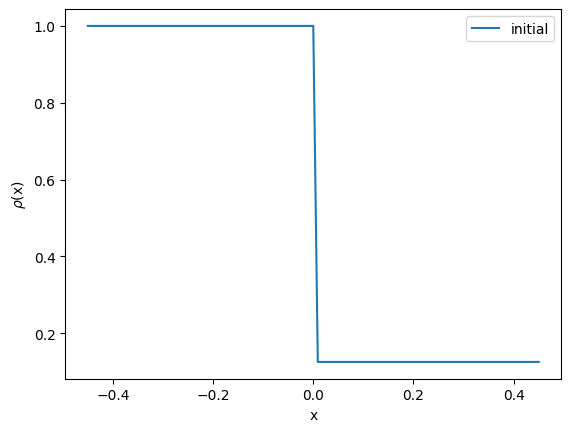

In [13]:
plt.plot(*rho_i.coordinates_meshgrid(), rho_i.data_xyz, label="initial")
plt.xlabel("x")
plt.ylabel(r"$\rho$(x)")
plt.legend()
plt.savefig("/home/jovyan/simulations/initial.png", dpi=200)

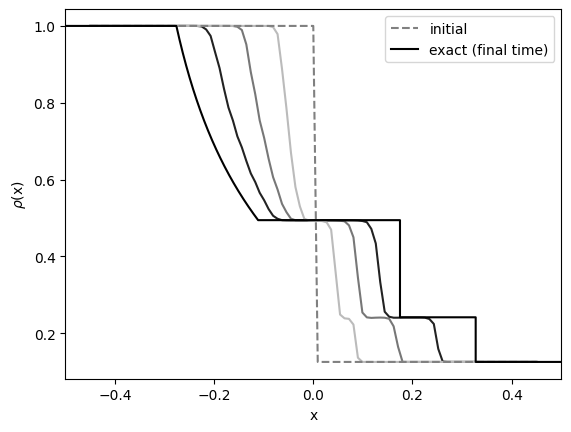

In [14]:
plt.plot(*rho_middle.coordinates_meshgrid(), rho_middle.data_xyz, color='#777777')
plt.plot(*rhoh.coordinates_meshgrid(), rhoh.data_xyz, color='#222222')
plt.plot(*rhop.coordinates_meshgrid(), rhop.data_xyz, color='#bbbbbb')
plt.plot(*rho_i.coordinates_meshgrid(), rho_i.data_xyz, label="initial", color='gray', linestyle='--')
plt.plot(x_exact, rho_exact, label="exact (final time)", color='k')
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel(r"$\rho$(x)")
plt.legend()
plt.savefig("/home/jovyan/simulations/evolut.png", dpi=200)
plt.show()

### Rest mass density

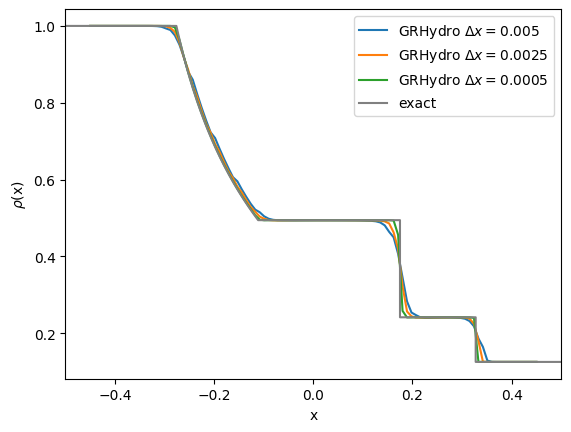

In [19]:
#solution interpolated on a grid of 100 points

plt.plot(*rho_final2.coordinates_meshgrid(), rho_final2.data_xyz, label=r"GRHydro $\Delta x=0.005$")
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro $\Delta x=0.0025$")
plt.plot(*rho_final3.coordinates_meshgrid(), rho_final3.data_xyz, label="GRHydro $\Delta x=0.0005$")
plt.plot(x_exact, rho_exact, label="exact", color='gray')
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel(r"$\rho$(x)")
plt.legend()
plt.savefig("/home/jovyan/simulations/pho.png", dpi=200)
plt.show()

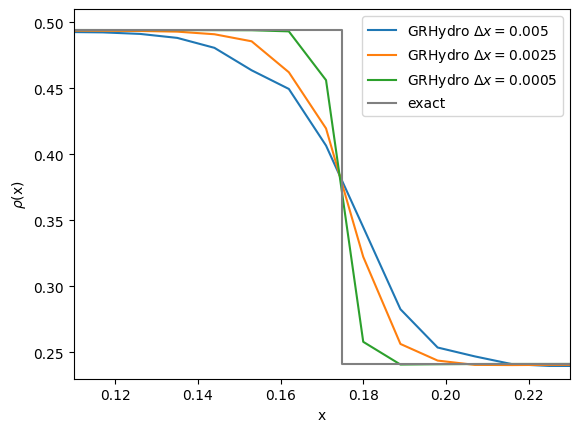

In [21]:
plt.plot(*rho_final2.coordinates_meshgrid(), rho_final2.data_xyz, label="GRHydro $\Delta x=0.005$")
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro $\Delta x=0.0025$")
plt.plot(*rho_final3.coordinates_meshgrid(), rho_final3.data_xyz, label="GRHydro $\Delta x=0.0005$")
plt.plot(x_exact, rho_exact, label="exact", color='gray')
plt.xlim(0.11, 0.23)
plt.ylim(0.23, 0.51)
plt.xlabel("x")
plt.ylabel(r"$\rho$(x)")
plt.legend()
plt.savefig("/home/jovyan/simulations/rho2.png", dpi=200)
plt.show()

### Pressure

In [23]:
press_final = press.read_on_grid(max(press.iterations), small_grid)
press2_final = press2.read_on_grid(max(press2.iterations), small_grid)
press3_final = press3.read_on_grid(max(press3.iterations), small_grid)

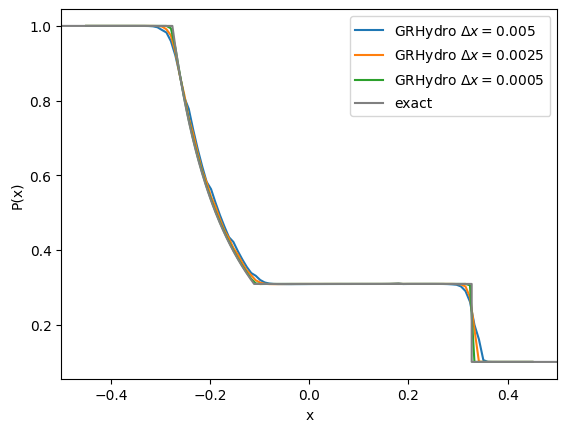

In [24]:
plt.plot(*press2_final.coordinates_meshgrid(), press2_final.data_xyz, label="GRHydro $\Delta x=0.005$")
plt.plot(*press_final.coordinates_meshgrid(), press_final.data_xyz, label="GRHydro $\Delta x=0.0025$")
plt.plot(*press3_final.coordinates_meshgrid(), press3_final.data_xyz, label="GRHydro $\Delta x=0.0005$")
plt.plot(x_exact, press_exact, label="exact", color='gray')
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel(r"P(x)")
plt.legend()
plt.savefig("/home/jovyan/simulations/Pressure.png", dpi=200)
plt.show()

### Velocity 

In [25]:
vel_final = vx.read_on_grid(max(vx.iterations), small_grid)
vel2_final = vx2.read_on_grid(max(vx2.iterations), small_grid)
vel3_final = vx3.read_on_grid(max(vx3.iterations), small_grid)

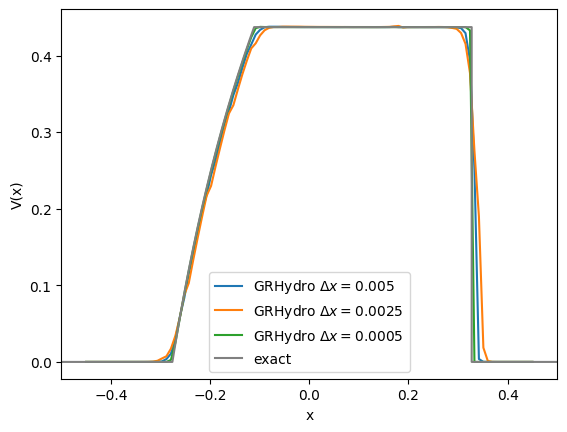

In [26]:
plt.plot(*vel_final.coordinates_meshgrid(), vel_final.data_xyz, label="GRHydro $\Delta x=0.005$")
plt.plot(*vel2_final.coordinates_meshgrid(), vel2_final.data_xyz, label="GRHydro $\Delta x=0.0025$")
plt.plot(*vel3_final.coordinates_meshgrid(), vel3_final.data_xyz, label="GRHydro $\Delta x=0.0005$")
plt.plot(x_exact, vx_exact, label="exact", color='gray')
plt.xlim(-0.5, 0.5)
plt.xlabel("x")
plt.ylabel(r"V(x)")
plt.legend()
plt.savefig("/home/jovyan/simulations/vel.png", dpi=200)
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process. Run simulation only on my laptop 

Running only in your laptop and using a grid we can use this methods



In [ ]:
#[iterazione][refinement level][component number] 

#refinment level zero is the full domain 
rho[0][0][0].data;

In [ ]:
#rho[0][1][0].data; #gives error because there is only 1 refirement level 

In [ ]:
rho[0][0][0].coordinates()[0].data;

In [ ]:
plt.scatter(rho2[100][0][0].coordinates()[0].data,rho2[100][0][0].data, label="Final iteraction", s=5)

plt.scatter(rho2[50][0][0].coordinates()[0].data,rho2[50][0][0].data, label="Intermediate iteration", s=5)

plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\rho$(x)")
plt.savefig("/home/jovyan/simulations/last.png", dpi=200)
plt.show()

#this are the row data without interpolation 

In [ ]:
#last method in this case is better, no interpolation

Different domains have different resolutions. If you choose resolution 1, it will be on a smaller domain.
You can optionally plot two resolutions on different domains within the same plot. 